<a href="https://colab.research.google.com/github/TaeMD/ML-projects/blob/main/HepatisC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/content/drive/My Drive/HepatitisCdata.csv')

In [4]:
df.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  615 non-null    int64  
 1   Category    615 non-null    object 
 2   Age         615 non-null    int64  
 3   Sex         615 non-null    object 
 4   ALB         614 non-null    float64
 5   ALP         597 non-null    float64
 6   ALT         614 non-null    float64
 7   AST         615 non-null    float64
 8   BIL         615 non-null    float64
 9   CHE         615 non-null    float64
 10  CHOL        605 non-null    float64
 11  CREA        615 non-null    float64
 12  GGT         615 non-null    float64
 13  PROT        614 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 67.4+ KB


In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,615.0,308.000000,177.679487,1.00,154.500,308.00,461.500,615.00
Age,615.0,47.408130,10.055105,19.00,39.000,47.00,54.000,77.00
ALB,614.0,41.620195,5.780629,14.90,38.800,41.95,45.200,82.20
ALP,597.0,68.283920,26.028315,11.30,52.500,66.20,80.100,416.60
ALT,614.0,28.450814,25.469689,0.90,16.400,23.00,33.075,325.30
AST,615.0,34.786341,33.090690,10.60,21.600,25.90,32.900,324.00
BIL,615.0,11.396748,19.673150,0.80,5.300,7.30,11.200,254.00
CHE,615.0,8.196634,2.205657,1.42,6.935,8.26,9.590,16.41
CHOL,605.0,5.368099,1.132728,1.43,4.610,5.30,6.060,9.67
CREA,615.0,81.287805,49.756166,8.00,67.000,77.00,88.000,1079.10


In [7]:
df.describe(include='object')

,Category,Sex
count,615,615
unique,5,2
top,0=Blood Donor,m
freq,533,377


In [8]:
df['Category'].value_counts()

0=Blood Donor             533
3=Cirrhosis                30
1=Hepatitis                24
2=Fibrosis                 21
0s=suspect Blood Donor      7
Name: Category, dtype: int64

In [9]:
df['Category'].unique()

array(['0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis',
       '2=Fibrosis', '3=Cirrhosis'], dtype=object)

In [10]:
map = {'0=Blood Donor':0, '0s=suspect Blood Donor':0, '1=Hepatitis':1,
       '2=Fibrosis':1, '3=Cirrhosis':1}

In [11]:
df['label'] = df['Category'].map(map)

In [12]:
df['label'].value_counts()

0    540
1     75
Name: label, dtype: int64

In [87]:
540/(540+75)

0.8780487804878049

In [13]:
sex = {'f':0, 'm':1}

In [14]:
df['Sex_n'] = df['Sex'].map(sex)

In [15]:
df.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,label,Sex_n
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,0,1
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,0,1
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,0,1
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,0,1
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,0,1


In [16]:
df.columns

Index(['Unnamed: 0', 'Category', 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST',
       'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT', 'label', 'Sex_n'],
      dtype='object')

In [17]:
new_df = df.drop(['Unnamed: 0', 'Category', 'Sex'], axis=1)

In [18]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     615 non-null    int64  
 1   ALB     614 non-null    float64
 2   ALP     597 non-null    float64
 3   ALT     614 non-null    float64
 4   AST     615 non-null    float64
 5   BIL     615 non-null    float64
 6   CHE     615 non-null    float64
 7   CHOL    605 non-null    float64
 8   CREA    615 non-null    float64
 9   GGT     615 non-null    float64
 10  PROT    614 non-null    float64
 11  label   615 non-null    int64  
 12  Sex_n   615 non-null    int64  
dtypes: float64(10), int64(3)
memory usage: 62.6 KB


In [19]:
new_df.corr()['label'].sort_values(ascending=False)[1:]

AST      0.621724
GGT      0.437680
BIL      0.398451
CREA     0.136772
ALT      0.089251
PROT     0.084453
Sex_n    0.071663
Age      0.037781
ALP     -0.069342
ALB     -0.180923
CHE     -0.230785
CHOL    -0.270496
Name: label, dtype: float64

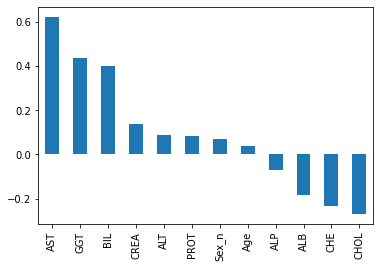

In [20]:
new_df.corr()['label'].sort_values(ascending=False)[1:].plot(kind='bar')

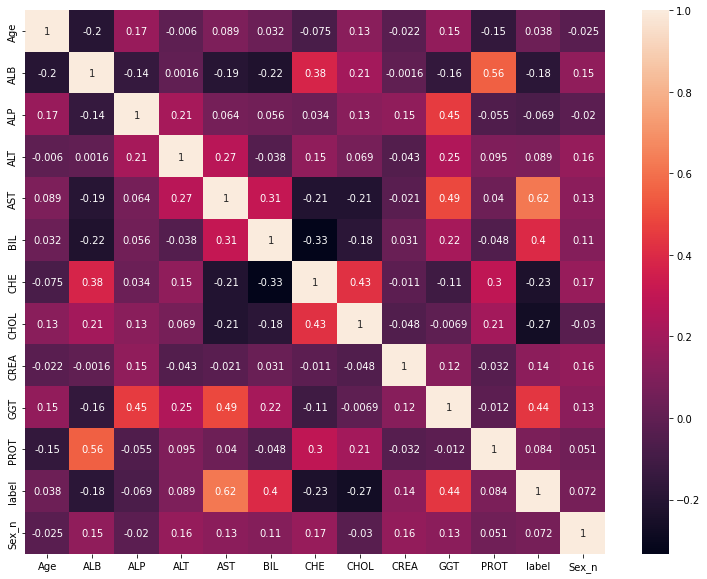

In [21]:
plt.figure(figsize=(13,10))
sns.heatmap(data=new_df.corr(), annot=True)

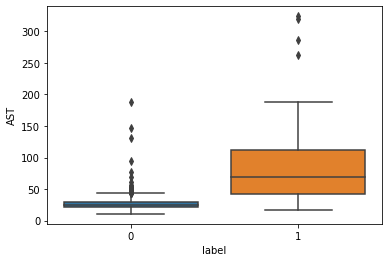

In [22]:
sns.boxplot(data=new_df, x='label', y='AST')

In [23]:
new_df.isna().sum()

Age       0
ALB       1
ALP      18
ALT       1
AST       0
BIL       0
CHE       0
CHOL     10
CREA      0
GGT       0
PROT      1
label     0
Sex_n     0
dtype: int64

In [24]:
new_df.corr()['ALP']

Age      0.173340
ALB     -0.141584
ALP      1.000000
ALT      0.214480
AST      0.063948
BIL      0.056078
CHE      0.033753
CHOL     0.125429
CREA     0.149832
GGT      0.454630
PROT    -0.055109
label   -0.069342
Sex_n   -0.019825
Name: ALP, dtype: float64

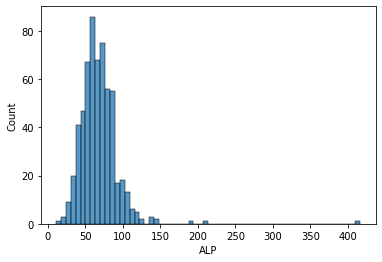

In [25]:
sns.histplot(data=new_df, x='ALP')

In [26]:
new_df[new_df['ALP'].isna()]

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,label,Sex_n
541,19,41.0,NaN,87.0,67.0,12.0,7.55,3.9,62.0,65.0,75.0,1,1
545,29,49.0,NaN,53.0,39.0,15.0,8.79,3.6,79.0,37.0,90.0,1,1
546,30,45.0,NaN,66.0,45.0,14.0,12.16,6.1,86.0,43.0,77.0,1,1
568,49,39.0,NaN,118.0,62.0,10.0,7.28,3.5,72.0,74.0,81.0,1,1
569,49,46.0,NaN,114.0,75.0,16.0,10.43,5.2,72.0,59.0,82.0,1,1
570,50,42.0,NaN,258.0,106.0,15.0,8.74,4.7,77.0,80.0,84.0,1,1
571,53,46.0,NaN,34.0,43.0,14.0,8.77,4.0,112.0,203.0,76.0,1,1
576,71,37.0,NaN,130.0,90.0,15.0,9.92,4.7,79.0,77.0,76.0,1,1
581,49,39.0,NaN,46.0,39.0,9.0,10.21,3.1,89.0,53.0,79.0,1,0
582,51,37.0,NaN,164.0,70.0,9.0,3.99,4.2,67.0,43.0,72.0,1,0


In [27]:
new_df.groupby('label')['ALP'].mean()

label
0    68.869815
1    62.733333
Name: ALP, dtype: float64

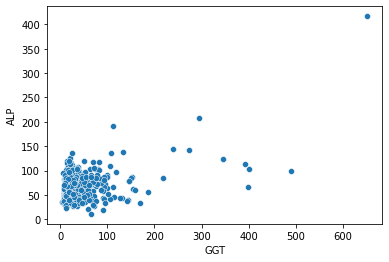

In [28]:
sns.scatterplot(data=new_df, x='GGT', y='ALP')

In [29]:
new_df['GGT'].describe()

count    615.000000
mean      39.533171
std       54.661071
min        4.500000
25%       15.700000
50%       23.300000
75%       40.200000
max      650.900000
Name: GGT, dtype: float64

(0.0, 200.0)

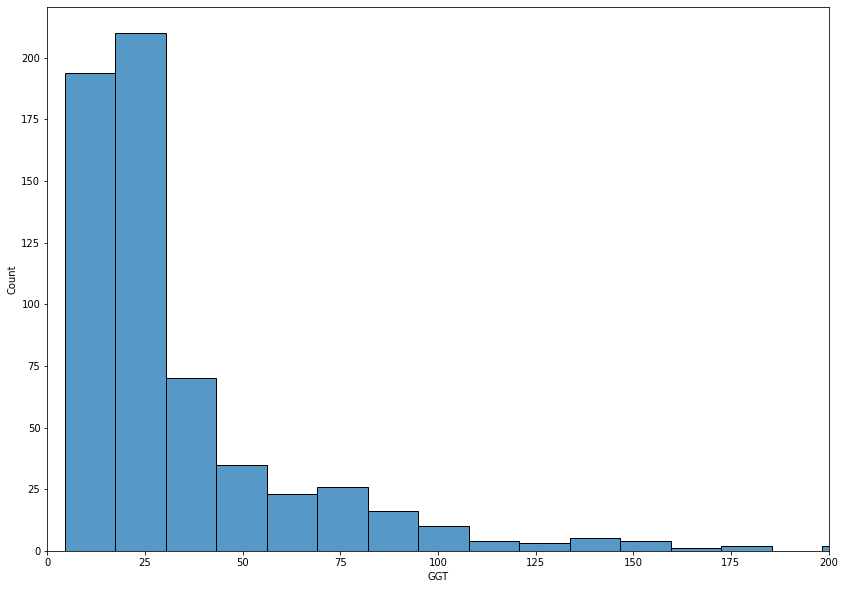

In [30]:
plt.figure(figsize=(14,10))
sns.histplot(data=new_df, x='GGT', bins=50)
plt.xlim(0,200)

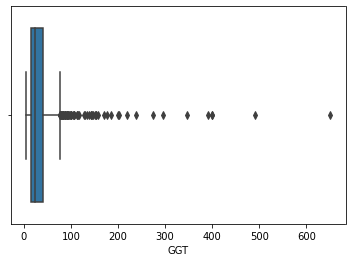

In [31]:
sns.boxplot(data=new_df, x='GGT')

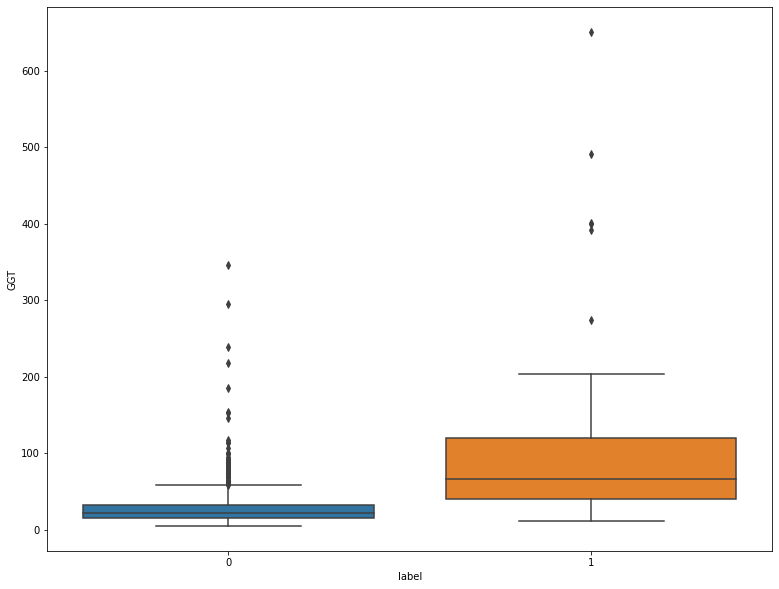

In [32]:
plt.figure(figsize=(13,10))
sns.boxplot(data=new_df, x='label', y='GGT')

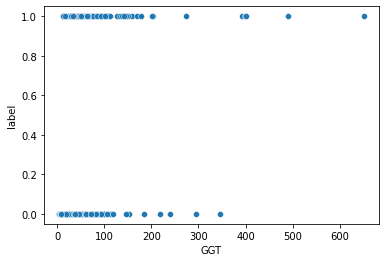

In [33]:
sns.scatterplot(data=new_df, y='label', x='GGT')

In [34]:
new_df[new_df['GGT'] <= 25]['label'].value_counts()

0    335
1      6
Name: label, dtype: int64

In [35]:
new_df[(new_df['GGT'] >= 25)&(new_df['GGT'] <50)]['label'].value_counts()

0    133
1     20
Name: label, dtype: int64

In [36]:
new_df[(new_df['GGT'] >= 50)&(new_df['GGT'] <75)]['label'].value_counts()

0    38
1    16
Name: label, dtype: int64

In [37]:
new_df[new_df['GGT'] >= 75]['label'].value_counts()

0    35
1    33
Name: label, dtype: int64

In [38]:
def convert(n):
  if n <75:
    return 0
  elif n >=75:
    return 1


In [39]:
new_df['GGT_C'] = new_df['GGT'].apply(convert)

In [40]:
new_df.groupby('GGT_C')['ALP'].mean()

GGT_C
0    66.233829
1    86.977966
Name: ALP, dtype: float64

In [41]:
new_df['ALP'] = new_df.groupby('GGT_C')['ALP'].transform(lambda x:x.fillna(x.mean()))

In [42]:
new_df.isnull().sum()

Age       0
ALB       1
ALP       0
ALT       1
AST       0
BIL       0
CHE       0
CHOL     10
CREA      0
GGT       0
PROT      1
label     0
Sex_n     0
GGT_C     0
dtype: int64

In [43]:
new_df.corr()['CHOL']

Age      0.125641
ALB      0.208248
ALP      0.118527
ALT      0.068947
AST     -0.209970
BIL     -0.180370
CHE      0.425456
CHOL     1.000000
CREA    -0.047744
GGT     -0.006895
PROT     0.207071
label   -0.270496
Sex_n   -0.030208
GGT_C    0.016759
Name: CHOL, dtype: float64

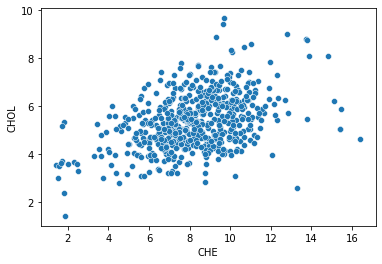

In [44]:
sns.scatterplot(data=new_df, x='CHE', y='CHOL')

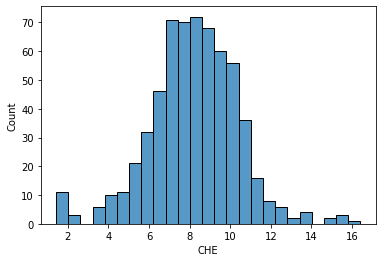

In [45]:
sns.histplot(data=new_df, x = 'CHE')

In [46]:
new_df['CHE'].describe()

count    615.000000
mean       8.196634
std        2.205657
min        1.420000
25%        6.935000
50%        8.260000
75%        9.590000
max       16.410000
Name: CHE, dtype: float64

In [47]:
def convert(n):
  if n <6:
    return 0
  elif n >=6 and n <12:
    return 1
  elif n>=12:
    return 2


In [48]:
new_df['CHE_C'] = new_df['CHE'].apply(convert)

In [49]:
new_df['CHOL']

0      3.23
1      4.80
2      5.20
3      4.74
4      4.32
       ... 
610    6.30
611    3.02
612    3.63
613    4.20
614    5.30
Name: CHOL, Length: 615, dtype: float64

In [50]:
new_df['CHOL']=new_df.groupby('CHE_C')['CHOL'].transform(lambda x:x.fillna(x.mean()))

In [51]:
new_df.isnull().sum()

Age      0
ALB      1
ALP      0
ALT      1
AST      0
BIL      0
CHE      0
CHOL     0
CREA     0
GGT      0
PROT     1
label    0
Sex_n    0
GGT_C    0
CHE_C    0
dtype: int64

In [52]:
new_df[new_df['ALB'].isna()]

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,label,Sex_n,GGT_C,CHE_C
603,65,NaN,86.977966,40.0,54.0,13.0,7.5,5.462337,70.0,107.0,79.0,1,1,1,1


In [53]:
new_df[new_df['PROT'].isna()]

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,label,Sex_n,GGT_C,CHE_C
590,46,20.0,86.977966,62.0,113.0,254.0,1.48,4.5585,114.0,138.0,NaN,1,1,1,0


In [54]:
new_df.groupby('label')['ALB'].median()

label
0    42.1
1    39.5
Name: ALB, dtype: float64

In [55]:
new_df['ALB']=new_df['ALB'].fillna(39)

In [56]:
new_df.groupby('label')['PROT'].median()

label
0    72.1
1    72.9
Name: PROT, dtype: float64

In [57]:
new_df['PROT']=new_df['PROT'].fillna(73)

In [58]:
new_df.isnull().sum()

Age      0
ALB      0
ALP      0
ALT      1
AST      0
BIL      0
CHE      0
CHOL     0
CREA     0
GGT      0
PROT     0
label    0
Sex_n    0
GGT_C    0
CHE_C    0
dtype: int64

In [59]:
new_df['ALT']=new_df['ALT'].fillna(new_df['ALT'].median())

In [60]:
new_df.head()

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,label,Sex_n,GGT_C,CHE_C
0,32,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,0,1,0,1
1,32,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,0,1,0,1
2,32,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,0,1,0,1
3,32,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,0,1,0,1
4,32,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,0,1,0,1


In [61]:
X = new_df.drop(['GGT_C', 'CHE_C', 'label'], axis=1)

In [62]:
y= new_df['label']

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [65]:
scaler = StandardScaler()

In [66]:
X_scaled = scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

In [67]:
from sklearn.ensemble import RandomForestClassifier

In [91]:
rf = RandomForestClassifier()

In [92]:
param_grid = {'n_estimators':[100,200,300,400,500,600],
             'criterion':['gini']}

In [93]:
from sklearn.model_selection import GridSearchCV

In [94]:
grid = GridSearchCV(rf, param_grid=param_grid, cv=5 )

In [95]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini'],
                         'n_estimators': [100, 200, 300, 400, 500, 600]})

In [96]:
grid.best_params_

{'criterion': 'gini', 'n_estimators': 300}

In [97]:
grid.cv_results_

{'mean_fit_time': array([0.17692842, 0.33498731, 0.49547544, 0.6265955 , 0.79264588,
        0.97264633]),
 'mean_score_time': array([0.01320801, 0.0240777 , 0.03608336, 0.0467134 , 0.0563765 ,
        0.08004823]),
 'mean_test_score': array([0.96528752, 0.96961197, 0.96963534, 0.96746143, 0.96528752,
        0.96963534]),
 'param_criterion': masked_array(data=['gini', 'gini', 'gini', 'gini', 'gini', 'gini'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[100, 200, 300, 400, 500, 600],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'criterion': 'gini', 'n_estimators': 100},
  {'criterion': 'gini', 'n_estimators': 200},
  {'criterion': 'gini', 'n_estimators': 300},
  {'criterion': 'gini', 'n_estimators': 400},
  {'criterion': 'gini', 'n_estimators': 500},
  {'criterion': 'gini', 'n_estimators': 600}

In [98]:
prediction = grid.predict(X_test)

In [99]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [100]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       128
           1       0.95      0.69      0.80        26

    accuracy                           0.94       154
   macro avg       0.94      0.84      0.88       154
weighted avg       0.94      0.94      0.94       154



In [101]:
print(confusion_matrix(y_test,prediction))

[[127   1]
 [  8  18]]


In [102]:
from sklearn.ensemble import GradientBoostingClassifier

In [103]:
gb = GradientBoostingClassifier()

In [104]:
param_grid = {'n_estimators':[100,200,300,400], 
              'learning_rate':[0.1,0.2,0.3],
              'max_depth':[1,2,3,4,5]}

In [105]:
grid = GridSearchCV(gb, param_grid=param_grid,cv=5,n_jobs=-1)

In [106]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': [1, 2, 3, 4, 5],
                         'n_estimators': [100, 200, 300, 400]})

In [107]:
grid.best_estimator_

GradientBoostingClassifier(max_depth=5, n_estimators=400)

In [108]:
grid.best_score_

0.9739597942964002

In [109]:
predictions = grid.predict(X_test)

In [110]:
accuracy_score(y_test, predictions)

0.948051948051948

In [111]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       128
           1       0.95      0.73      0.83        26

    accuracy                           0.95       154
   macro avg       0.95      0.86      0.90       154
weighted avg       0.95      0.95      0.95       154



In [112]:
print(confusion_matrix(y_test,predictions))

[[127   1]
 [  7  19]]


In [113]:
from sklearn.svm import SVC

In [114]:
svc = SVC()

In [116]:
param_grid = {'C':[0.01,0.1,0.5,1,5,10,100],
              'kernel':['linear','poly','rbf'],
              'gamma':['auto','scale'],
              'degree':[3,4]}

In [117]:
grid = GridSearchCV(svc, param_grid=param_grid, n_jobs=-1)

In [118]:
grid.fit(X_scaled,y_train)

GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 0.5, 1, 5, 10, 100], 'degree': [3, 4],
                         'gamma': ['auto', 'scale'],
                         'kernel': ['linear', 'poly', 'rbf']})

In [119]:
grid.best_estimator_

SVC(C=5, gamma='auto')

In [120]:
grid.best_params_

{'C': 5, 'degree': 3, 'gamma': 'auto', 'kernel': 'rbf'}

In [122]:
grid.best_score_

0.9739831697054699

In [121]:
pred = grid.predict(X_test_scaled)

In [123]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       128
           1       0.82      0.69      0.75        26

    accuracy                           0.92       154
   macro avg       0.88      0.83      0.85       154
weighted avg       0.92      0.92      0.92       154

